In [48]:
# data
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.util import dataframe_utils

# process mining 
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

# Visualization
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization

# misc 
from pm4py.objects.conversion.process_tree import converter as pt_converter

In [49]:
#Dataset location - Event log of a loan application process - https://data.4tu.nl/articles/_/1268920
log = xes_importer.apply('loan_application_process_event_log_2012.xes')

parsing log, completed traces ::   0%|          | 0/13087 [00:00<?, ?it/s]

In [50]:
# Alpha Miner
net, initial_marking, final_marking = alpha_miner.apply(log)

# Visualization
gVisualization = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gVisualization)


In [51]:
# add information about frequency to the Visualization 
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gVisualization = pn_visualizer.apply(net, initial_marking, final_marking, 
                           parameters=parameters, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)

# save the Petri net
pn_visualizer.view(gVisualization)


replaying log with TBR, completed variants ::   0%|          | 0/4366 [00:00<?, ?it/s]

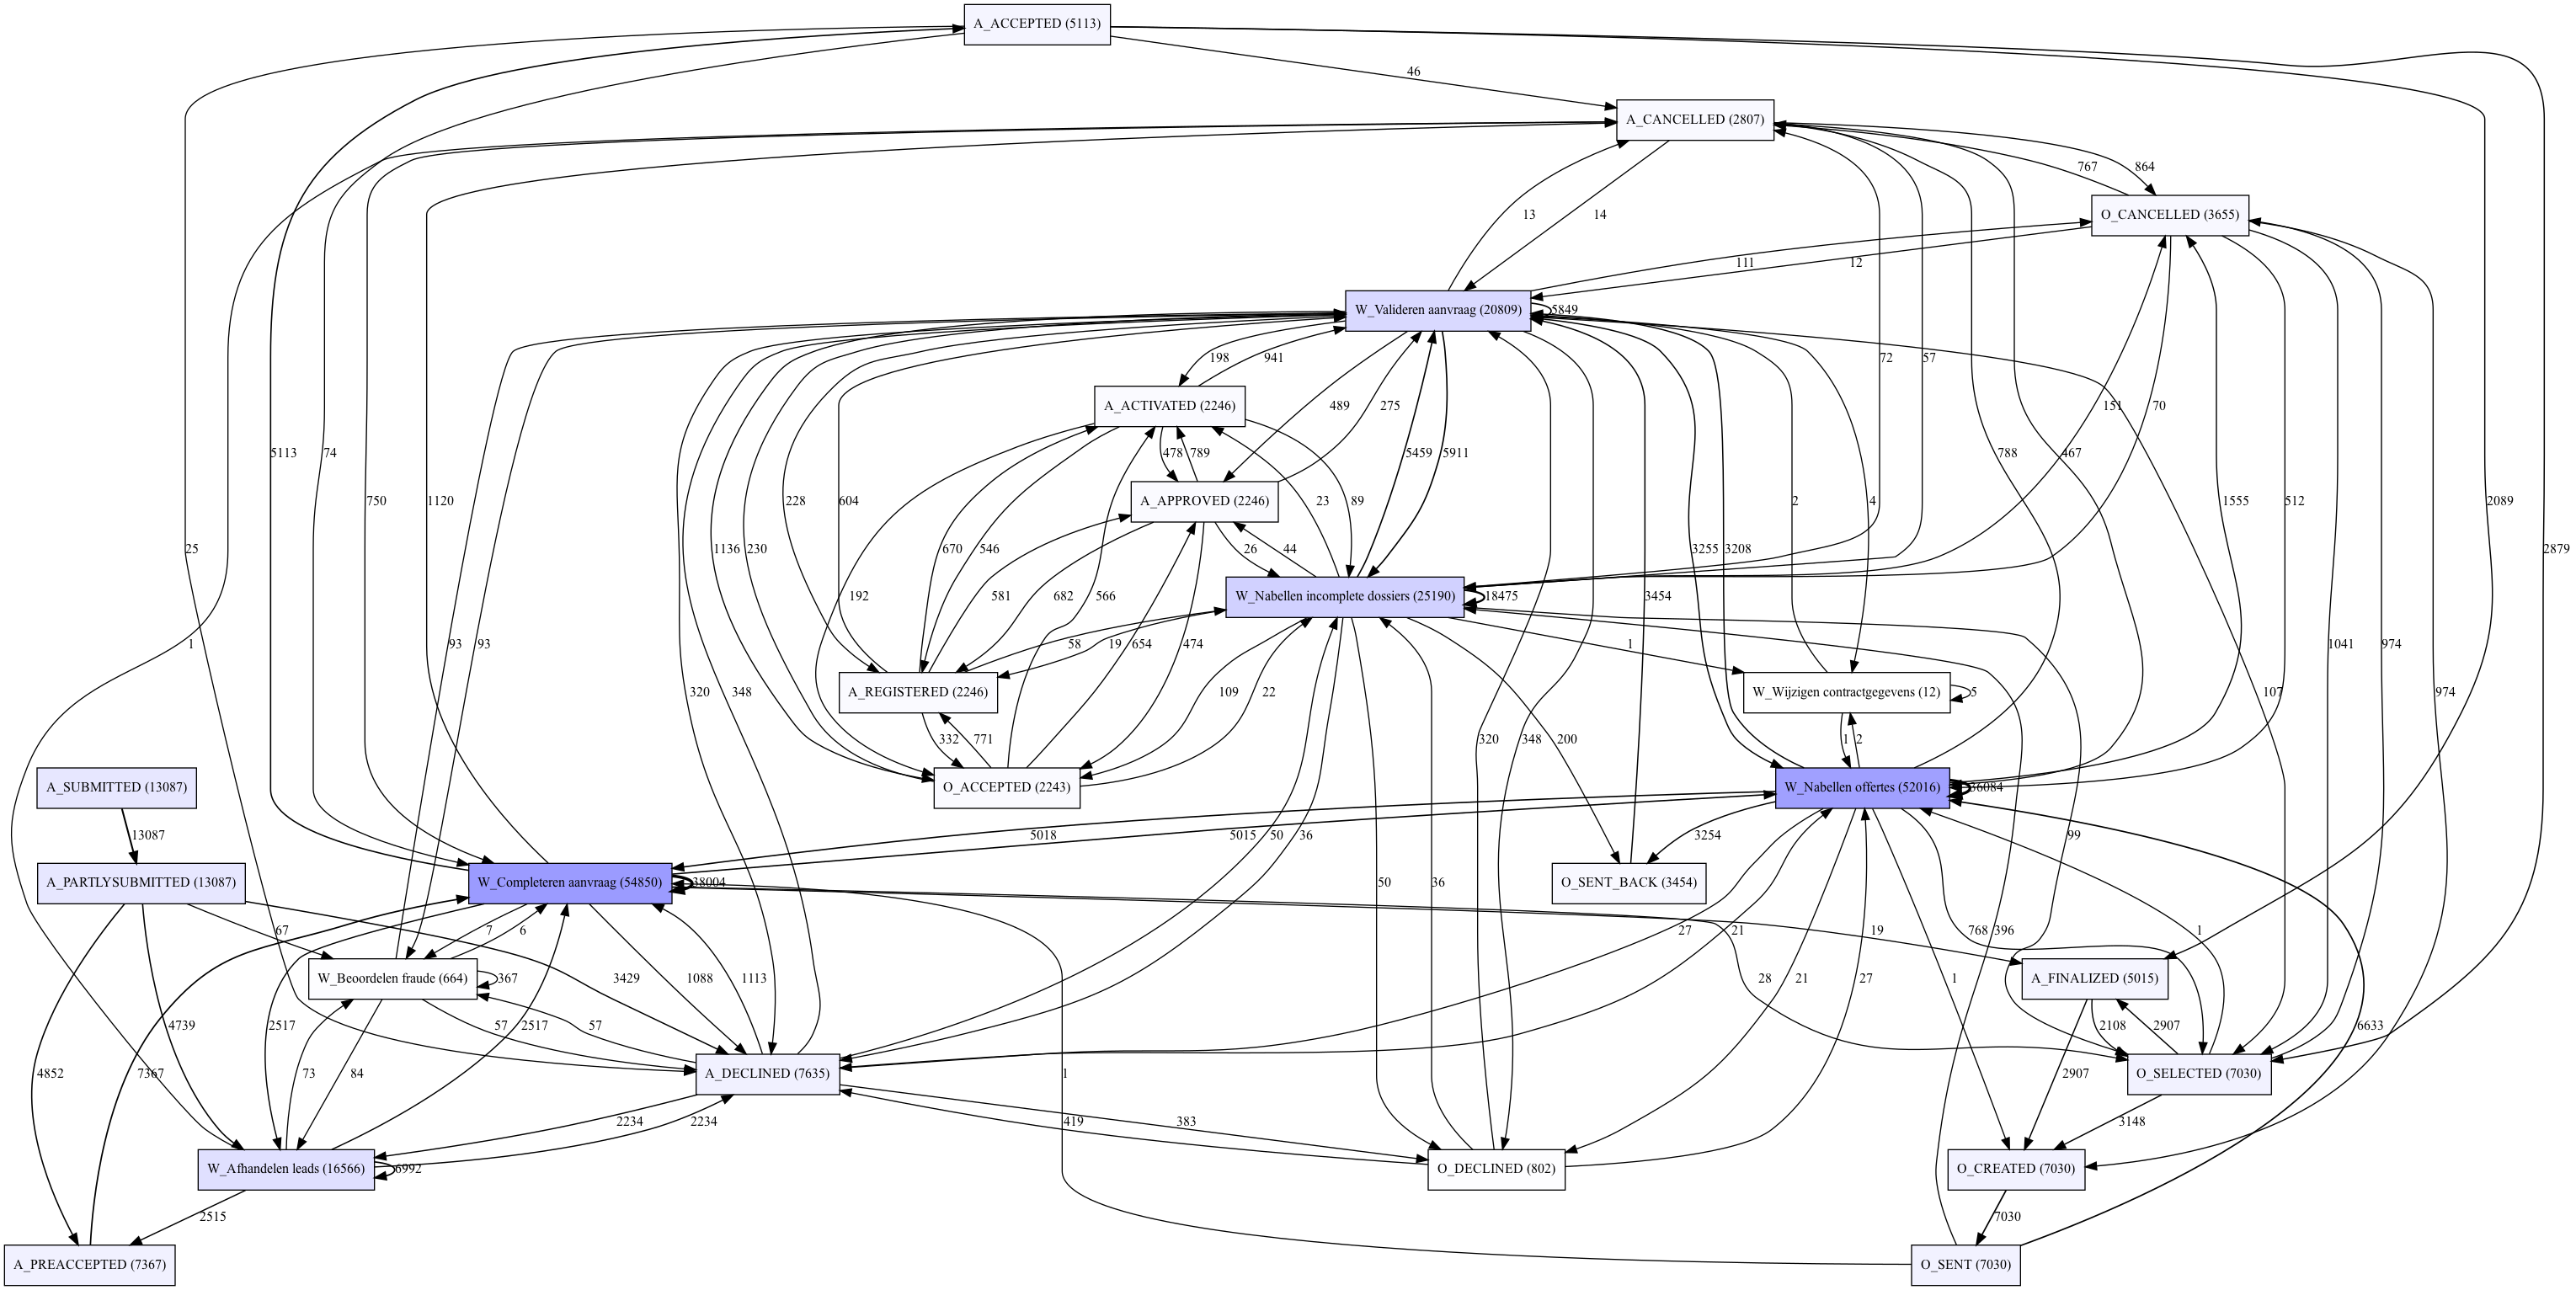

In [52]:
# Directly-Follows Graph
# creatig the graph from log
dfg = dfg_discovery.apply(log)

# Visualization
gVisualization = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gVisualization)

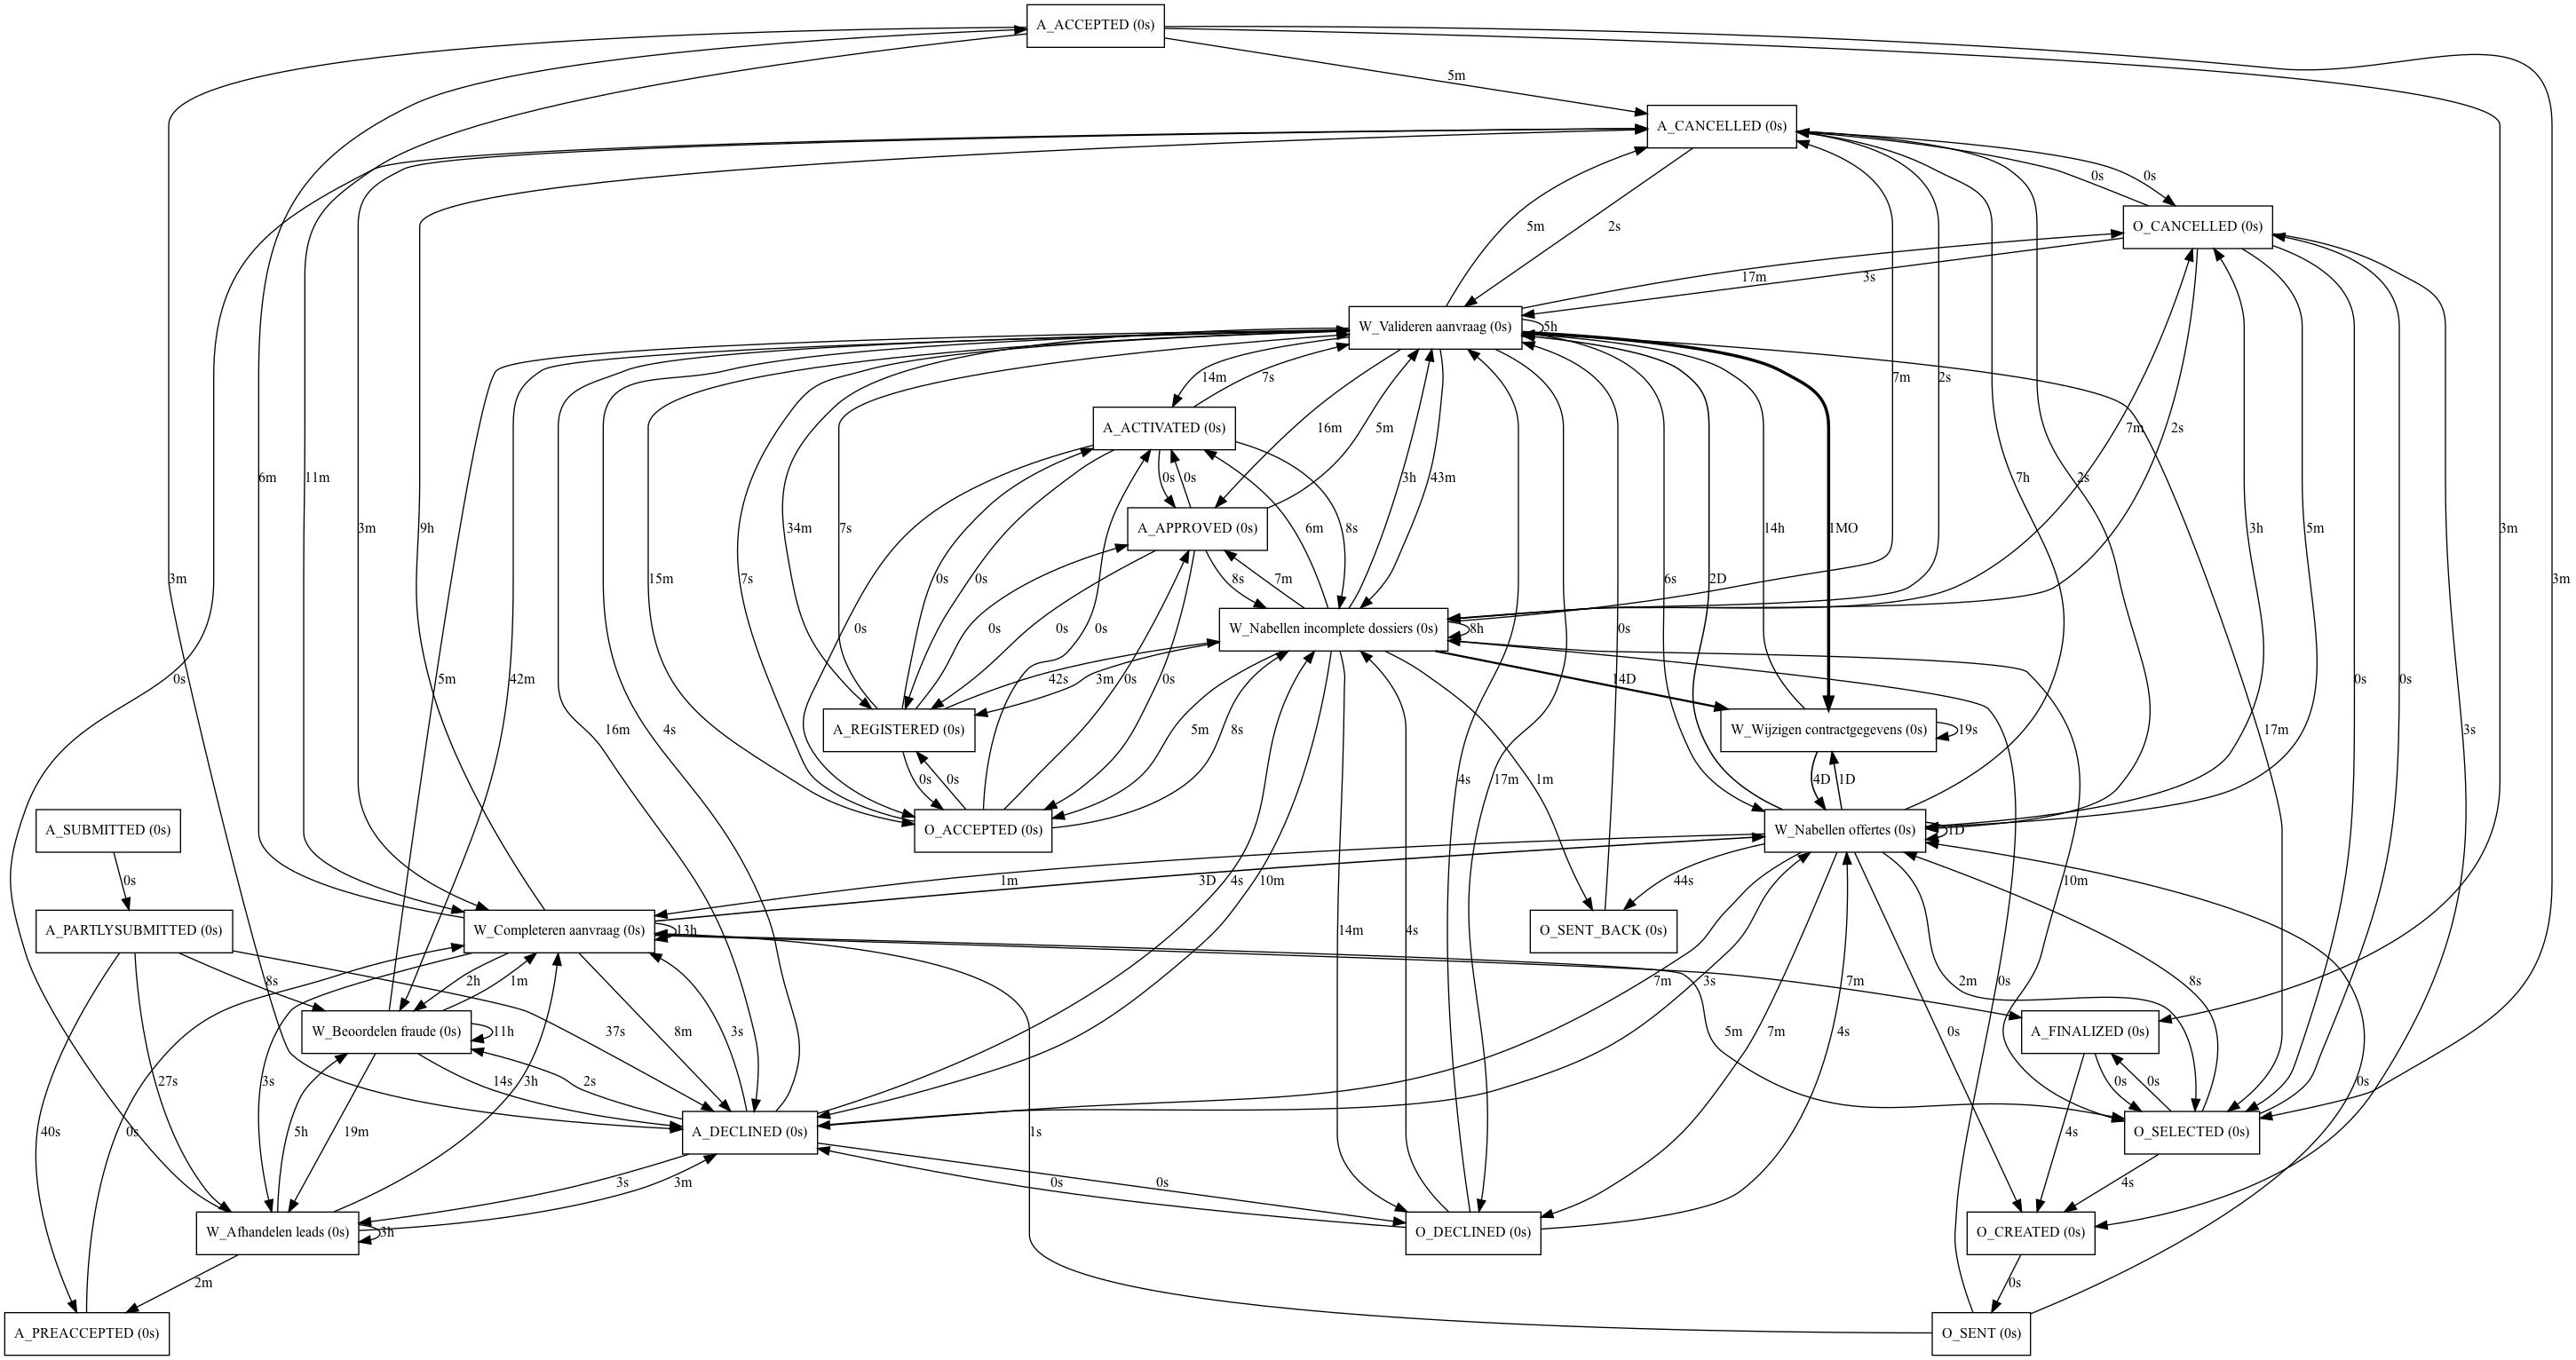

In [53]:
# creatig the graph from log
dfg = dfg_discovery.apply(log, variant=dfg_discovery.Variants.PERFORMANCE)

# Visualization
gVisualization = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.PERFORMANCE)
dfg_visualization.view(gVisualization)

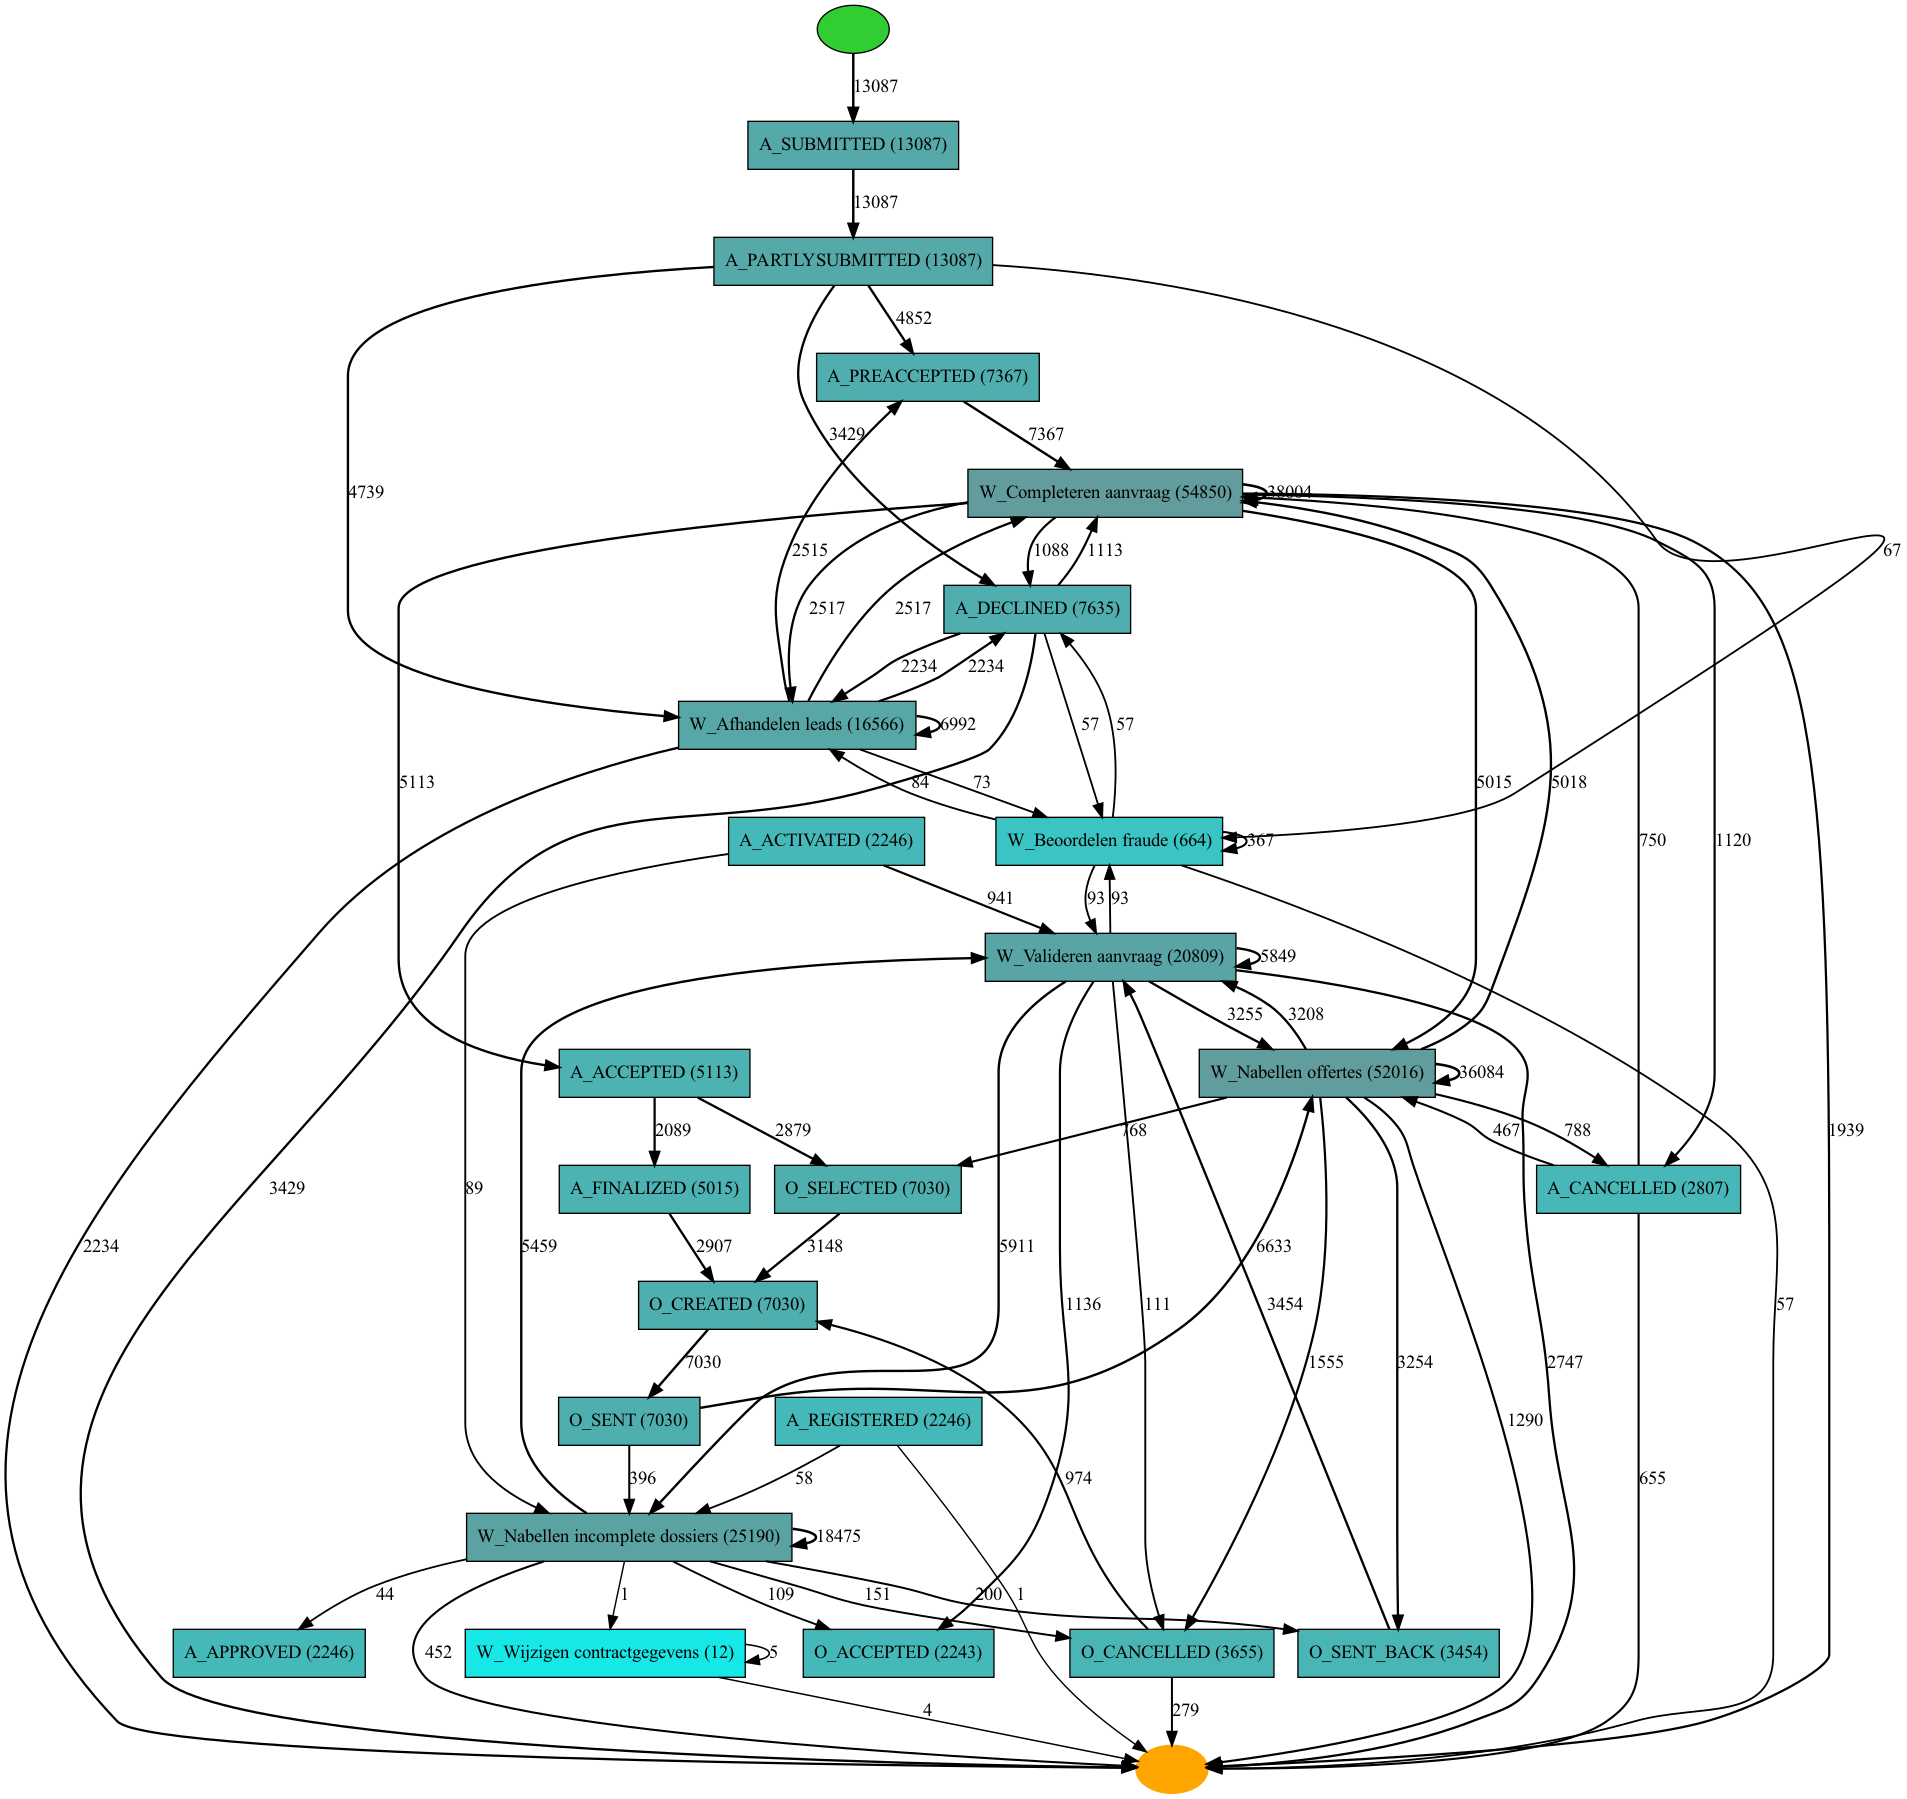

In [54]:
# Heuristic Miner
heu_net = heuristics_miner.apply_heu(log)

# Visualization
gVisualization = hn_visualizer.apply(heu_net)
hn_visualizer.view(gVisualization)

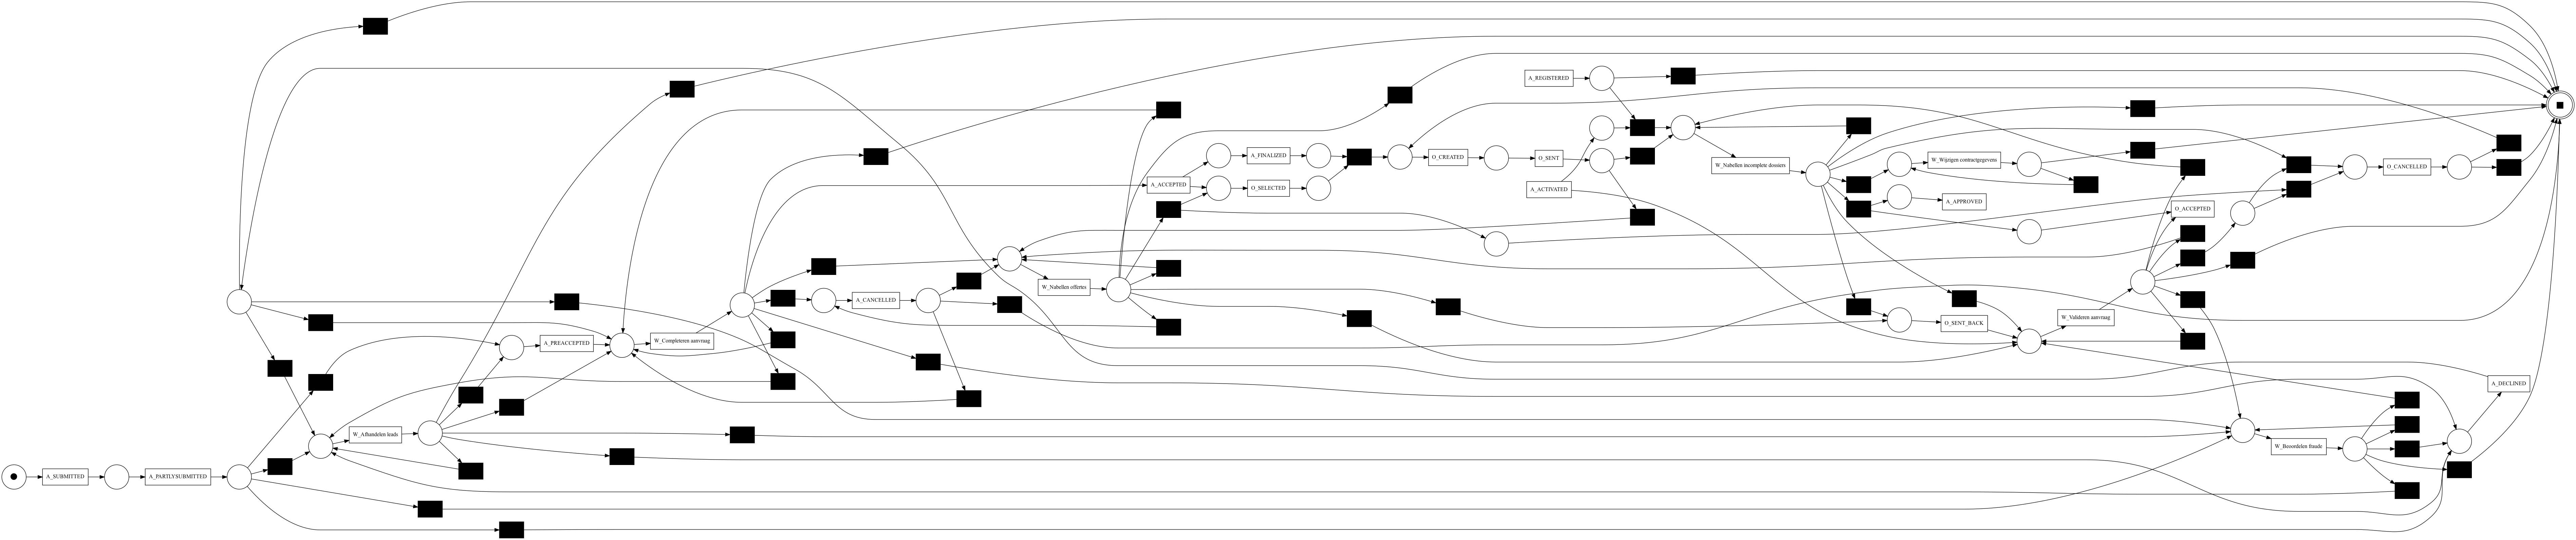

In [55]:
# heuristics miner
net, im, fm = heuristics_miner.apply(log)

# Visualization
gVisualization = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gVisualization)

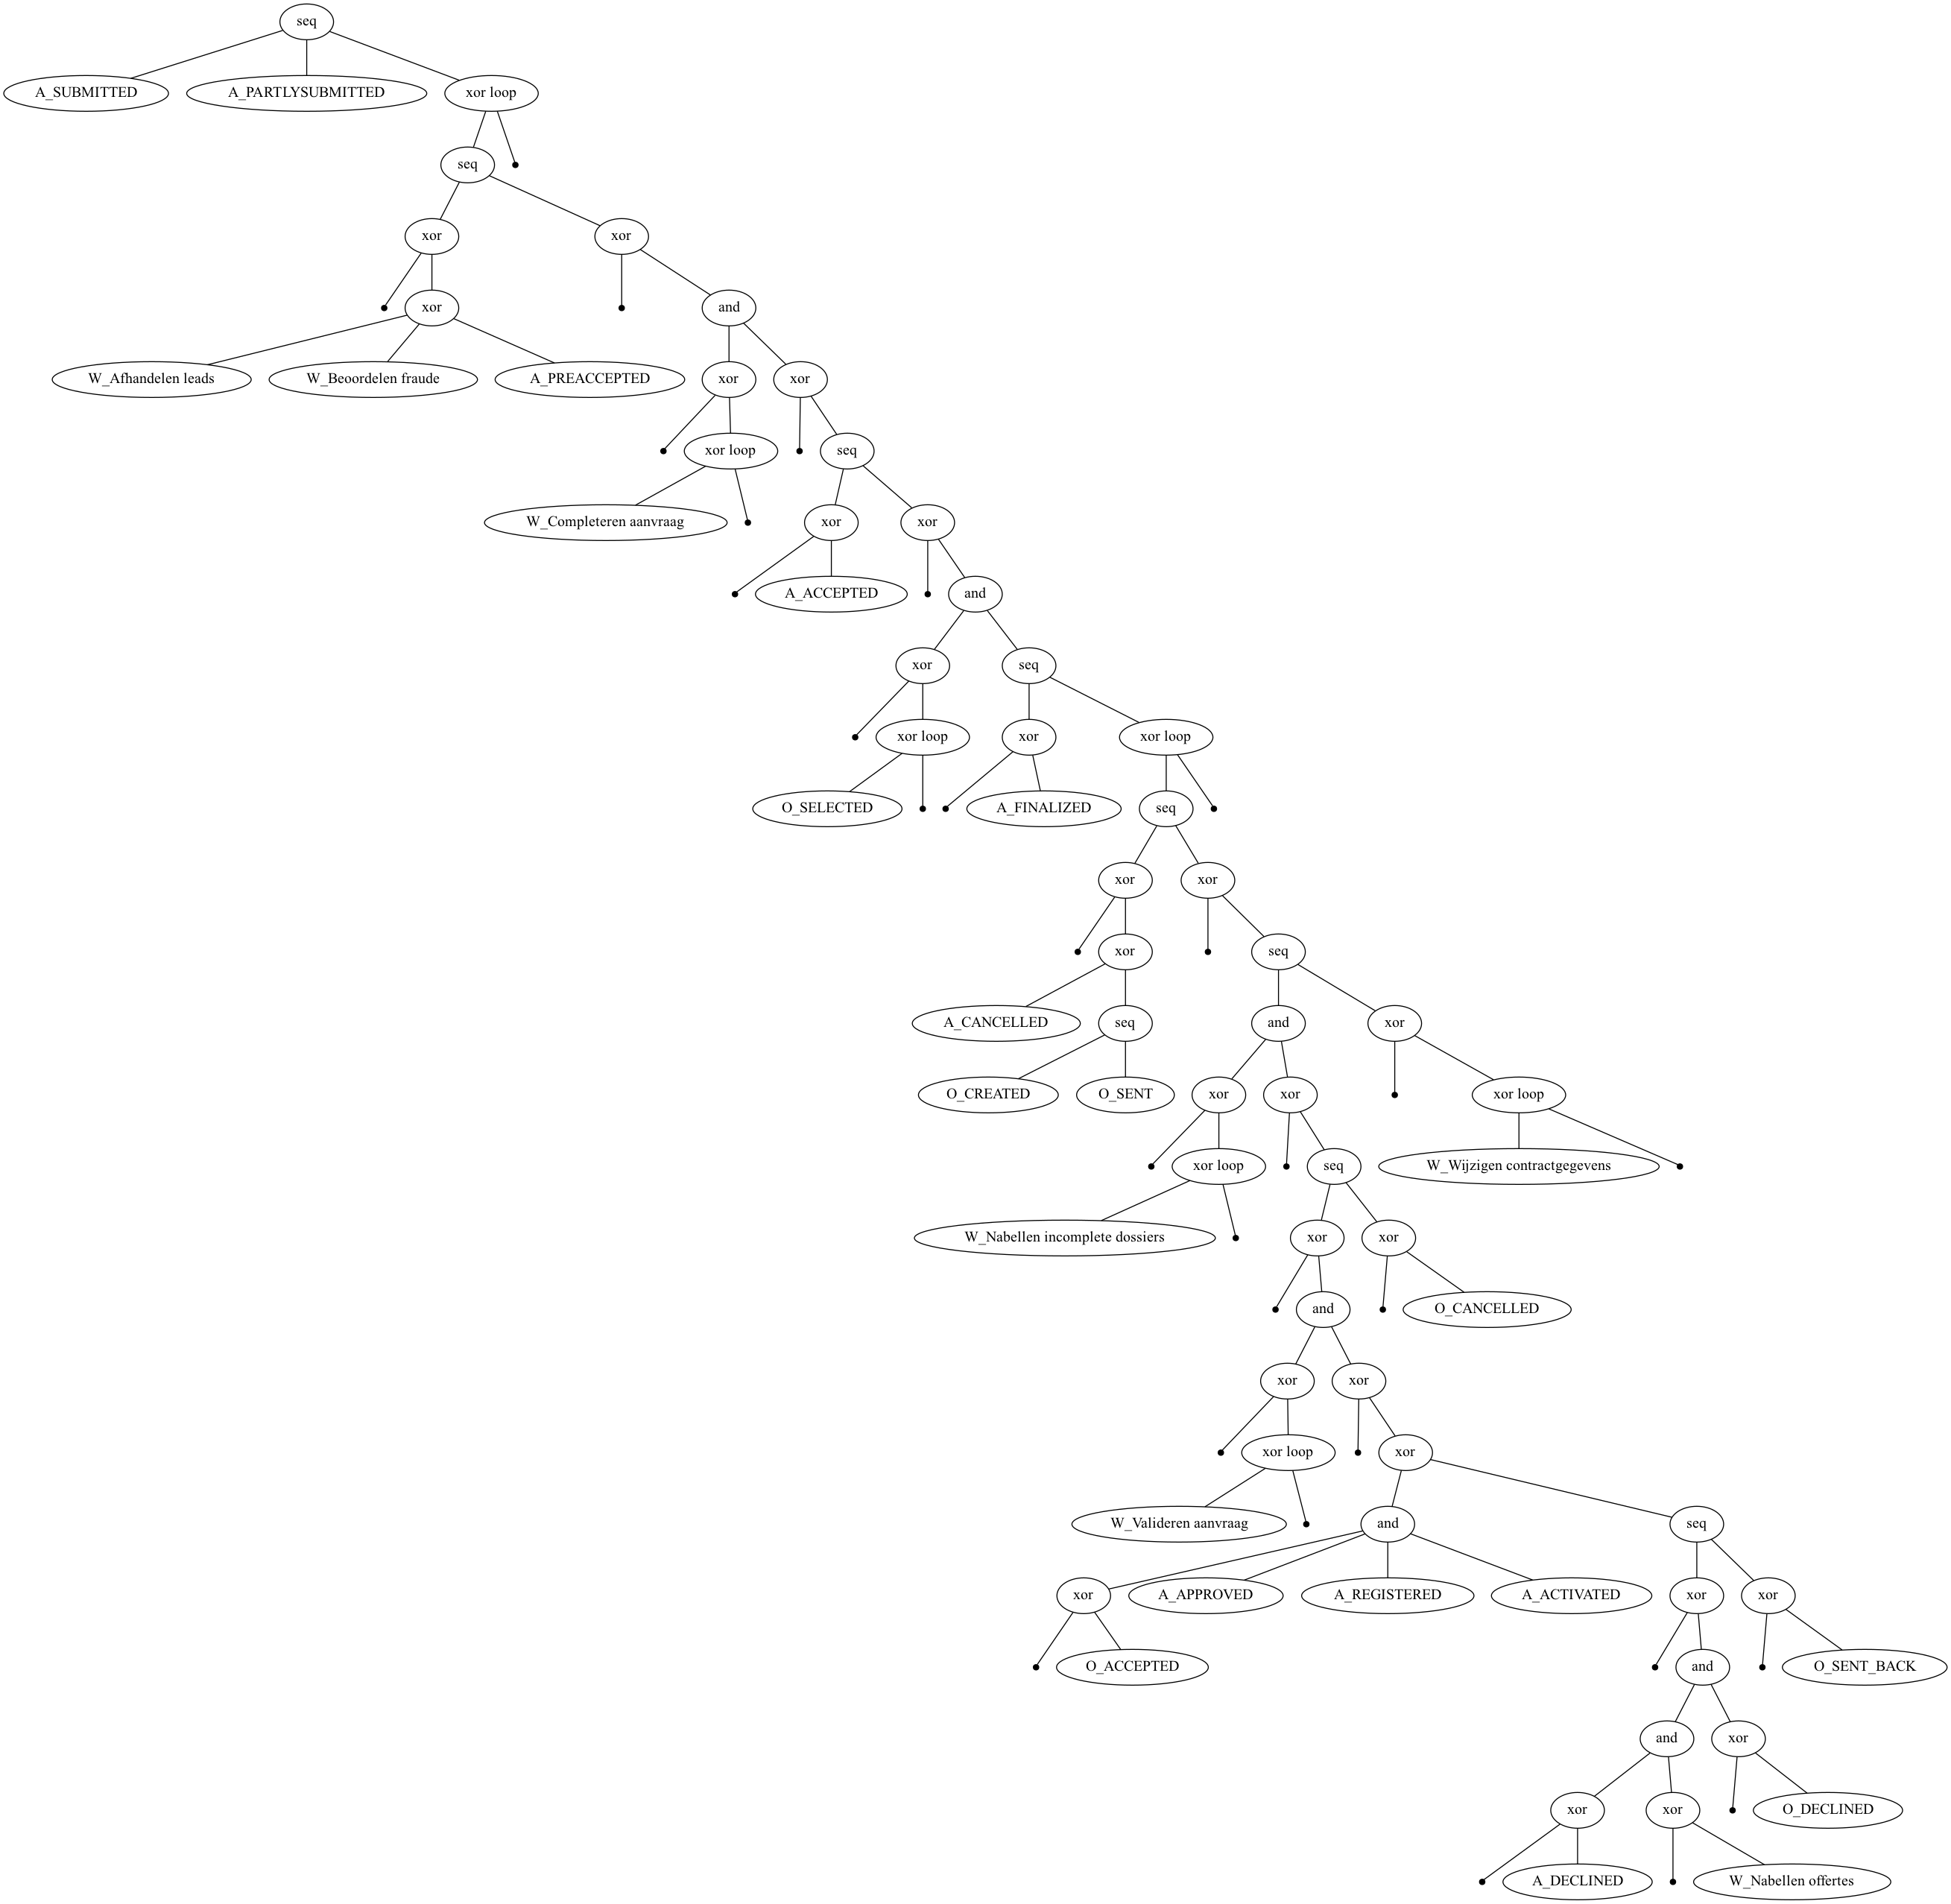

In [56]:
# Inductive Miner
# create the process tree

tree = inductive_miner.apply(log)

# Visualization
gVisualization = pt_visualizer.apply(tree)
pt_visualizer.view(gVisualization)

In [57]:
# convert the process tree to a petri net
net, initial_marking, final_marking = pt_converter.apply(tree)

# alternatively, use the inductive_miner to create a petri net from scratch
# net, initial_marking, final_marking = inductive_miner.apply(log)

# Visualization
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gVisualization = pn_visualizer.apply(net, initial_marking, final_marking, 
                           parameters=parameters, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)
pn_visualizer.view(gVisualization)

replaying log with TBR, completed variants ::   0%|          | 0/4366 [00:00<?, ?it/s]